# Hard Margin Case

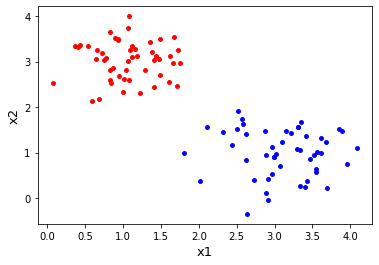

In [ ]:
import numpy as np
import pandas as pd
import csv
from numpy import genfromtxt
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
import cvxopt
%matplotlib inline

# Use pandas to load data from files.
# Store the data from “X.csv” to X and target from “y.csv” to y
X = np.asarray(pd.read_csv("/content/X.csv", engine = "python"))
y = np.asarray(pd.read_csv("/content/y.csv", engine = "python"))

def plot(X,y):
  # Use np.where to find all index of data which y=1 and store them to idx_1
  idx_1 = np.where(y==1)[0]

  # same as y=-1, store them to idx_2
  idx_2 = np.where(y==-1)[0]

  # make the plot use plt.scatter(X[idx_1,0], X[idx_1,1], s=30, c='b', marker="o")
  plt.scatter(X[idx_1,0], X[idx_1,1], s=15, c='b', marker="o")
  plt.scatter(X[idx_2,0], X[idx_2,1], s=15, c='r', marker="o")

  # Set the x label with x1 and y label with x2
  plt.xlabel('x1', fontsize=13)
  plt.ylabel('x2', fontsize=13)

  #plt.show()

plot(X,y)

In [ ]:
def linear_svm(X,y):
    solvers.options['show_progress'] = False
#     store the shape of X to two variables: N,F
    N,F = X.shape

#     create the Identity matrix using np.diag and np.ones
    I = np.identity(F)     

#     create the Q matrix using np.zeros
    Q = np.zeros((F+1,F+1))

#     for each element in Q:
#         when row number is 0, set Q[row, col]=0
#         when col number is 0 set Q[row,col]=0
#         else, compute Identity [row-1,col-1] and set it to Q[row,col]
#     use cvxopt.matrix to create a new variable p with value Q

    for row in range(F+1):
      for column in range(F+1):
        if row==0 or column==0:
          Q[row,column] = 0
        else:
          Q[row,column] = I[row-1,column-1]
    
    # use cvxopt.matrix to create a new variable p with value Q
    p = cvxopt.matrix(Q)
    
    # use cvxopt.matrix to create a new variable q with value np.zeros(F+1)
    q = cvxopt.matrix(np.zeros(F+1))

    # create an empty list
    l = []
    for n in range(N):
      # create a zero matric with size F+1
      Z = np.zeros(F+1)
      # for each element in the matric above:
      for i in range(len(Z)):
        # when the index=0, then set it to 1
        if i == 0:
          Z[i] = 1
        #  else, set the value to X[n].T[i-1]
        else:
          Z[i] = X[n].T[i-1]
      #  append the y[n]*updated matric to the empty list above (the one above the for loop
      l.append(y[n]*Z)   
    # change the empty list to the np array and times -1
    l = np.array(l)*(-1)

    # use cvxopt.matrix to convert above np array and store it in a variable: G
    G = cvxopt.matrix(l)
    # create a variable named h with value np.ones(N)*-1 and convert it to cvxopt
    h = cvxopt.matrix(np.ones(N)*-1)
    # solve the primal using cvxopt.solvers.qp
    answer = cvxopt.solvers.qp(p,q,G,h)
    #  return the answer.
    return answer

# fit svm classifier
answer = linear_svm(X,y)
w = answer['x']

# print the weights
print('<< weights >>\n', w)

<< weights >>
 [ 4.61e-01]
[ 1.42e+00]
[-1.59e+00]



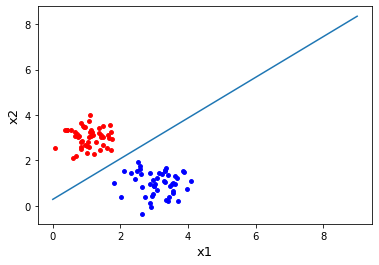

In [ ]:
def plot_data_with_decision_boundary(X, y, w, mark = 1, fig_size=(15, 9), labels=['x1', 'x2']):
#     Added default arg "draw". If draw==1, plot. Else, only return xval and yval.
#     Took out the w0 parameter because 
#     Decision Boundary: w1x + w2y + b = 0 (in our case, b = w[0]) 
#     find the slope of the decision boundary
  slope = -w[1] / w[2]

#     find the intercept.
  intercept = -w[0] / w[2]

#     generate several x values np.arrange()
  xval = np.arange(10)

#     calculate its y values using intercept and slope
  yval = xval * slope + intercept

  # Coded this part for convenience: To use this function more diversely depending on the parameters.
  if mark == 1:
#     plot the dataset
    plot(X,y)
  else:
    pass

#     plot a line
  plt.plot(xval, yval)

# plotting the points and decision boundary using the above function
plot_data_with_decision_boundary(X,y,w,1)

Determine which points are closest to the decision boundary. What is the functional margin of the points closest to the decision boundary?   

Nearest data points: 
[2.51879639 1.91565724]
[1.71138733 2.45204836]

Index of the points: 
48
67

Distance to the decision boundary: 
0.46909184421108463
0.4690918434840354

Margin: 
0.93818368769512



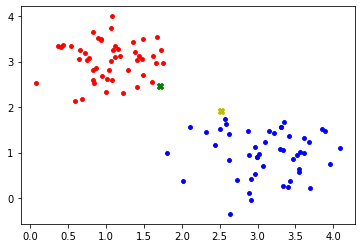

In [ ]:
import math

# calculate distance from each point to the decision boundary
# find the nearest data points and its index.

idx_1 = np.where(y==1)[0]
idx_2 = np.where(y==-1)[0]

min_distance1, index1 = 0, 0
for i in idx_1:
  distance = abs((w[1] * X[i,0] + w[2] * X[i,1] + w[0])) / (math.sqrt(w[1] * w[1] + w[2] * w[2]))
  if min_distance1==0:
    min_distance1 = distance
    index1 = i
  if min_distance1 >= distance:
    min_distance1 = distance
    index1 = i
point_idx_1 = X[index1]


min_distance2, index2 = 0, 0
for i in idx_2:
  distance = abs((w[1] * X[i,0] + w[2] * X[i,1] + w[0])) / (math.sqrt(w[1] * w[1] + w[2] * w[2]))
  if min_distance2==0:
    min_distance2 = distance
    index2 = i
  if min_distance2 >= distance:
    min_distance2 = distance
    index2 = i
point_idx_2 = X[index2]

print('Nearest data points: \n{}\n{}'.format(point_idx_1, point_idx_2))
print('\nIndex of the points: \n{}\n{}'.format(index1, index2))
print('\nDistance to the decision boundary: \n{}\n{}'.format(min_distance1, min_distance2))
print('\nMargin: \n{}\n'.format(min_distance1 + min_distance2))

# indicating the two nearestt data points from both labels on a plot
plt.scatter(X[idx_1,0], X[idx_1,1], s=15, c='b', marker="o")
plt.scatter(X[idx_2,0], X[idx_2,1], s=15, c='r', marker="o")

plt.scatter(point_idx_1[0], point_idx_1[1], s=40, c='y', marker="X")
plt.scatter(point_idx_2[0], point_idx_2[1], s=40, c='g', marker="X")

Writing the decision function $f_{\texttt{primal}}({\bf x})$ to predict examples. Using this function to predict the label of $(3.0, 1.5)^T$ and $(1.2, 3.0)^T$

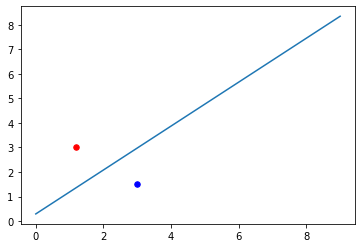

In [ ]:
def f_primal(x): 
#     return the predicted value using svm primal
  x = np.asarray(x)
  distance = (w[1] * x[0] + w[2] * x[1] + w[0]) / (math.sqrt(w[1] * w[1] + w[2] * w[2]))
  if distance < 0:
    label = 'r'
  else:
    label = 'b'
  
  return x[0], x[1], label

# using f_ primal() to predict (3.0, 1.5) and (1.2, 3.0) and plot the figure.

point1 = f_primal([3.0, 1.5])
point2 = f_primal([1.2, 3.0])

plot_data_with_decision_boundary(X,y,w,0)
plt.scatter(point1[0], point1[1], s=30, c=point1[2], marker="o")
plt.scatter(point2[0], point2[1], s=30, c=point2[2], marker="o")